<a href="https://colab.research.google.com/github/jiin124/2021_2_SAI_ML/blob/main/%EC%8B%A0%EC%9A%A9%EC%B9%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 신용카드

https://www.kaggle.com/arjunbhasin2013/ccdata

CUSID : 신용카드 소지자 식별(범주)

잔액 : 구매하기 위해 계좌에 남아 있는 잔액(잔액)

밸런스 빈도: 밸런스 업데이트 빈도, 점수 0~1(1 = 자주 업데이트됨, 0 = 자주 
업데이트되지 않음)

구매 : 계정에서 구매한 금액

1회 구매 : 한 번에 최대 구매금액

할부구매 : 할부구매금액

캐시어드밴스 : 사용자가 미리 지급한 현금

구매 빈도 : 구매 빈도, 0~1점(1 = 자주 구매, 0 = 자주 구매하지 않음)

일회 구매 빈도 : 한 번에 구매하는 빈도(1 = 자주 구매, 0 = 자주 구매하지 않음)

할부 빈도 : 할부 구매 빈도(1 = 자주 구매, 0 = 자주 구매하지 않음

현금결제 빈도 : 선불주파수

CASHADVANCETRX : "고급 현금"을 이용한 거래건수

구매건수 : 구매거래건수

신용한도 : 이용자의 신용카드 한도

결제 : 사용자별 결제금액

최소_지급액 : 사용자별 최소지급액

PRCFULL 지불 : 사용자가 지불한 전체 지불액의 백분율

테뉴어 : 신용카드 이용기간

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
os.environ['KAGGLE_USERNAME']='jiinpp'
os.environ['KAGGLE_KEY']='b06d525a9f66198051ccb648b091778a'

In [3]:
!kaggle datasets download -d arjunbhasin2013/ccdata

  0% 0.00/340k [00:00<?, ?B/s]
100% 340k/340k [00:00<00:00, 11.0MB/s]


In [4]:
!unzip '*.zip'

Archive:  ccdata.zip
  inflating: CC GENERAL.csv          


In [5]:
df=pd.read_csv("CC GENERAL.csv")
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [7]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [8]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

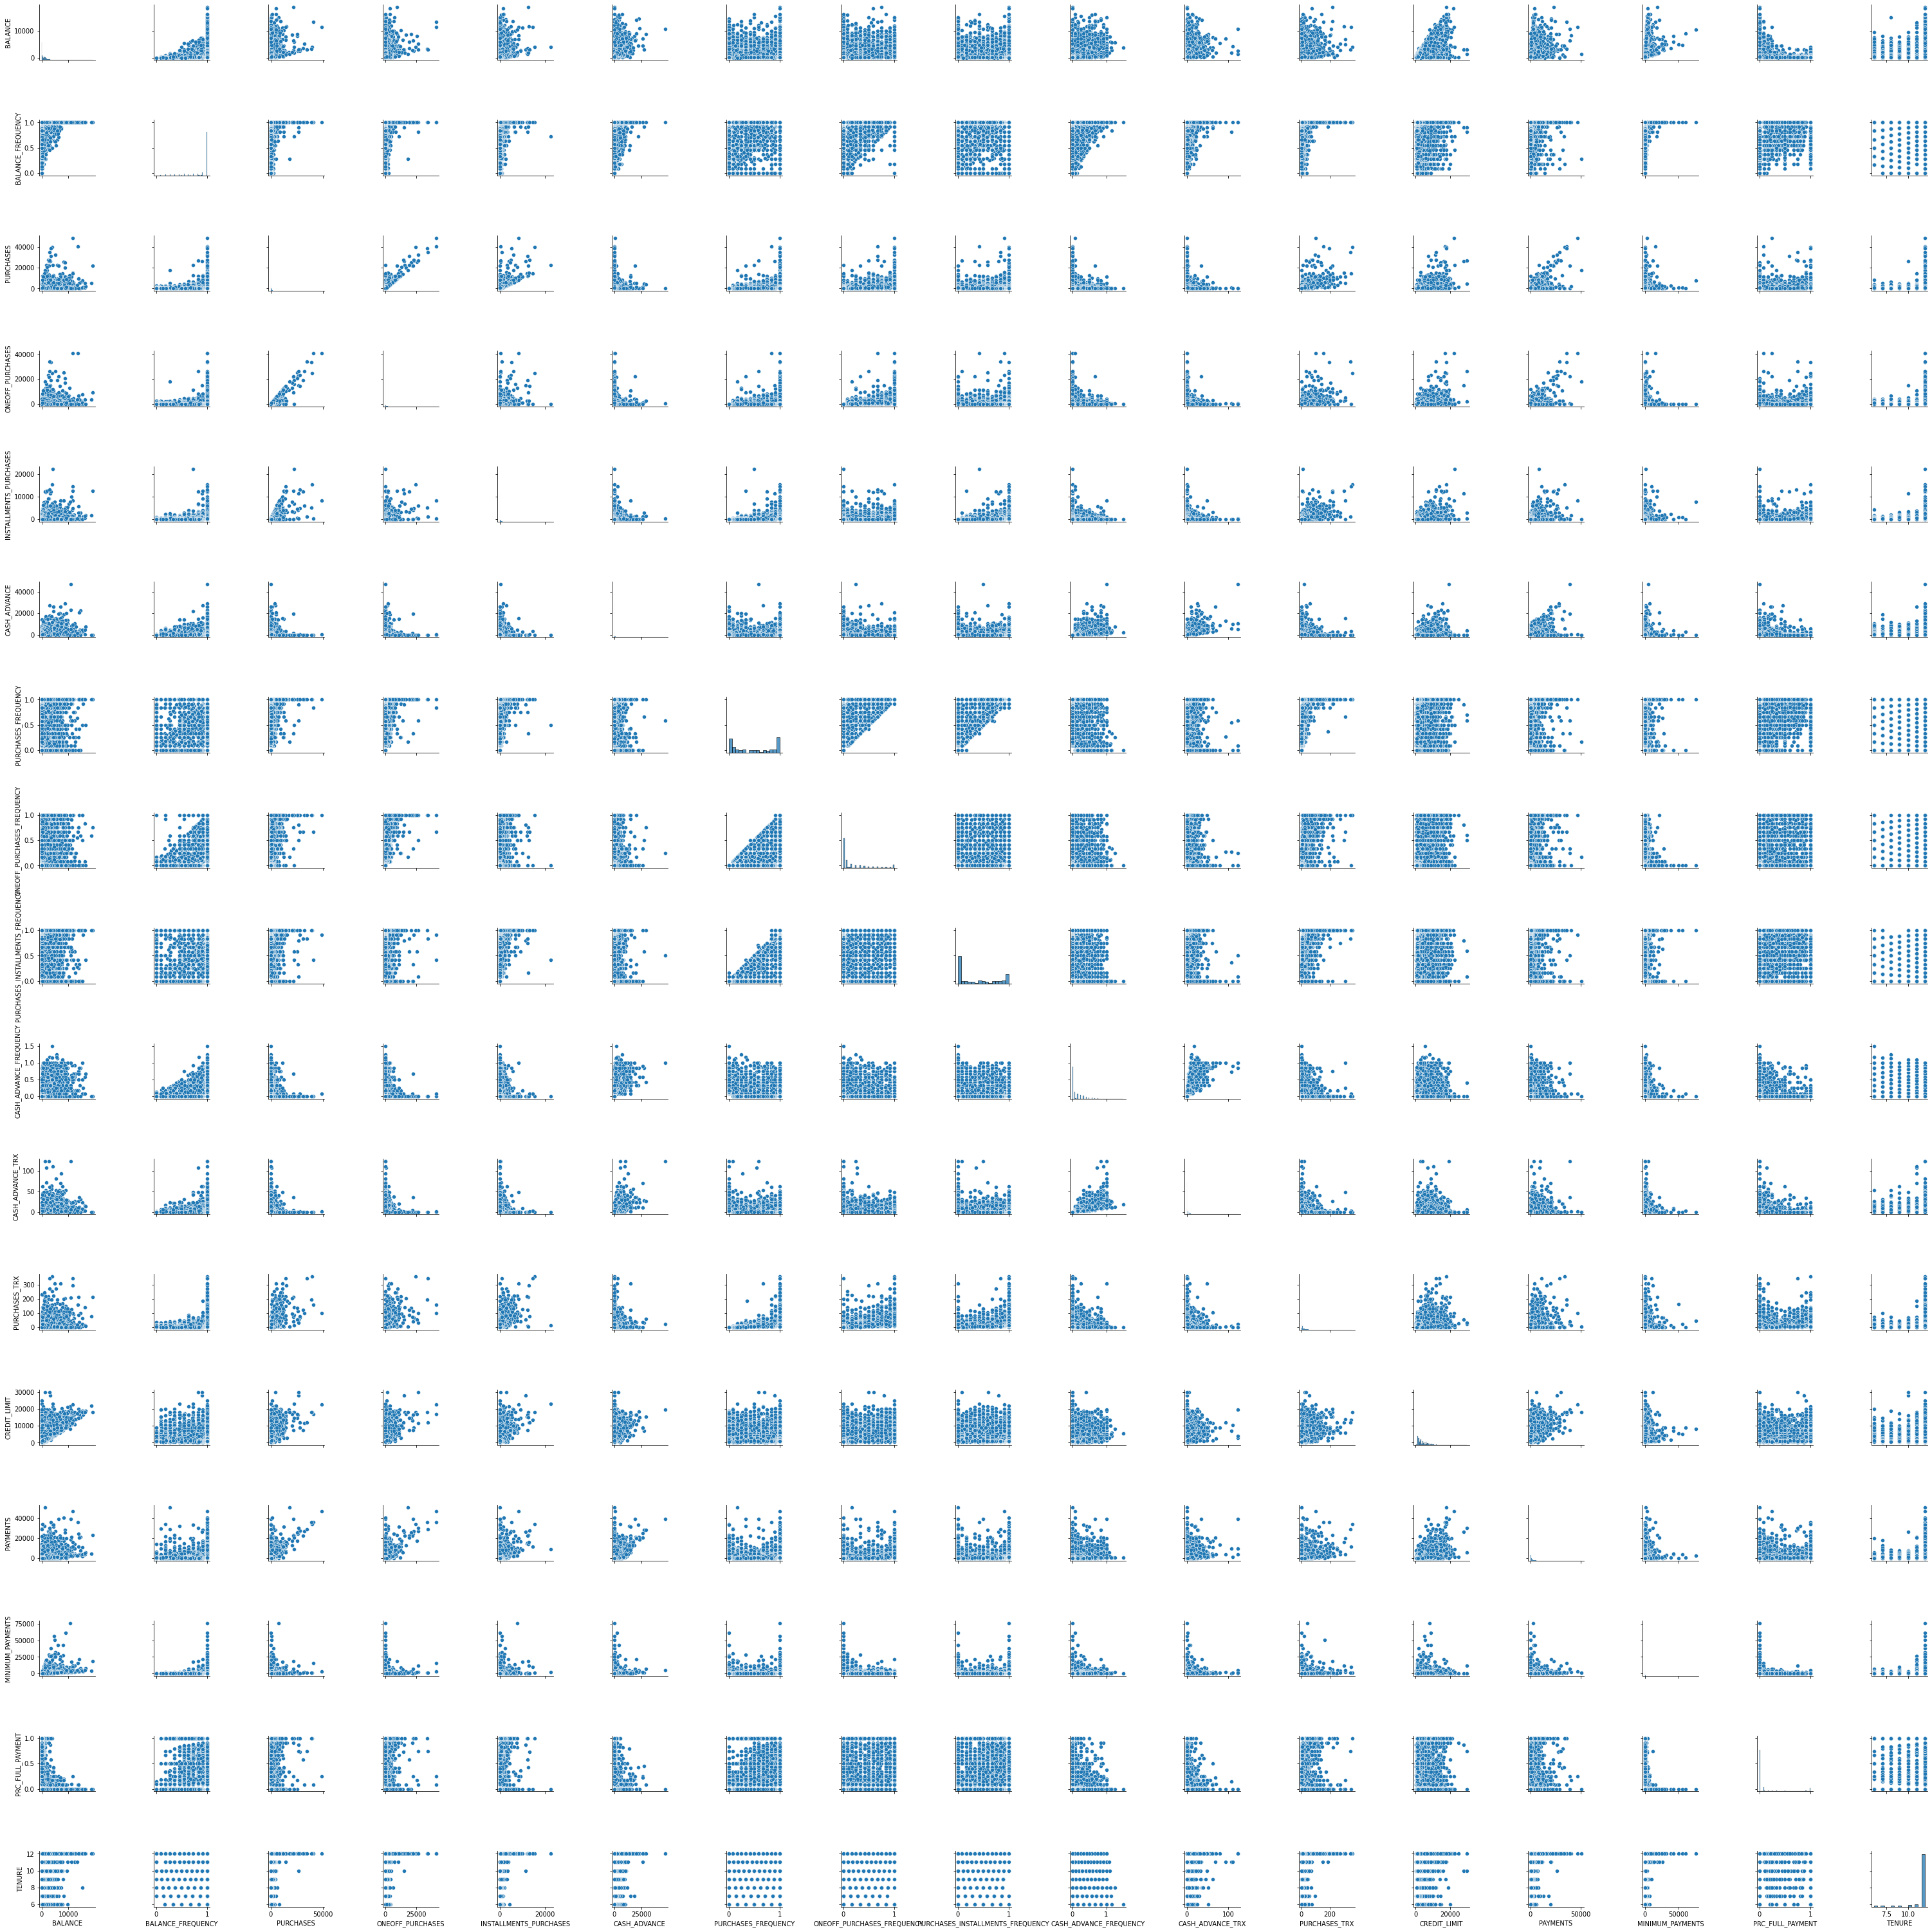

In [9]:
sns.pairplot(df)

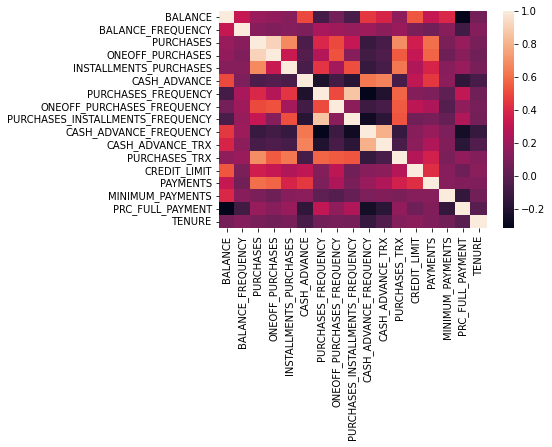

In [10]:
sns.heatmap(df.corr())

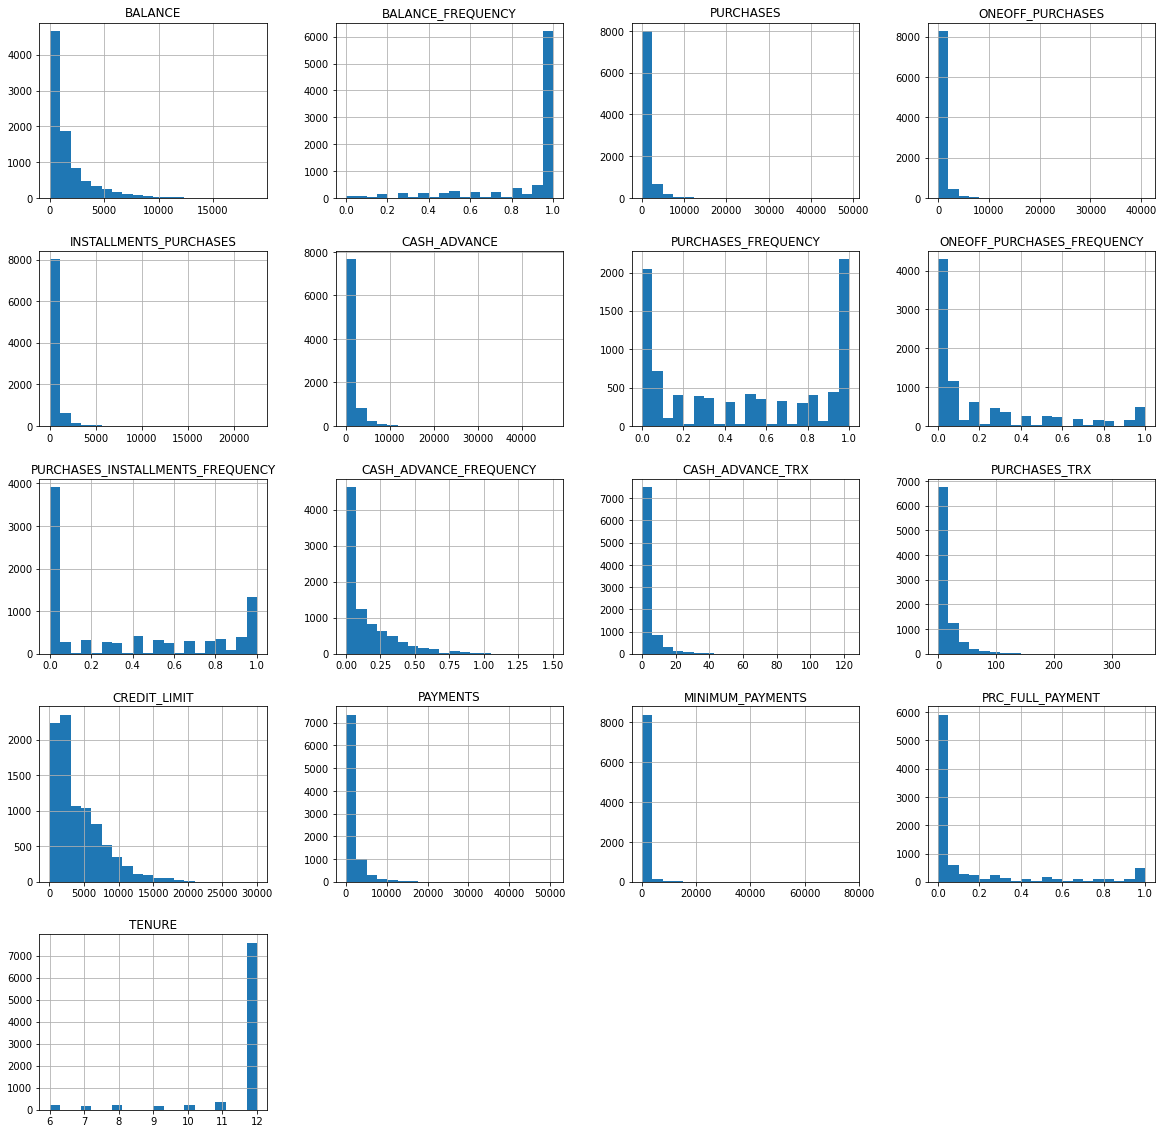

In [11]:
plt.rcParams["figure.figsize"] = (20, 20)
df.hist(bins=20)
plt.show()

In [12]:
df.drop('CUST_ID',axis=1,inplace=True)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

std_scaler=StandardScaler()
df_scaled=std_scaler.fit_transform(df)
df_scaled.shape

(8950, 17)

In [19]:
df_scaled=pd.DataFrame(df_scaled,columns=df.columns)
df_scaled

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.360680
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.360680
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.360680
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826016,-0.598688,NaN,-0.525551,0.360680
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.360680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,-0.737950,0.518084,-0.333293,-0.356934,-0.132643,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.486217,-0.343682,1.183951,-4.122768
8946,-0.742423,0.518084,-0.329136,-0.356934,-0.122823,-0.466786,1.269843,-0.678661,1.179833,-0.675349,-0.476070,-0.350408,-0.960380,-0.503396,NaN,-0.525551,-4.122768
8947,-0.740398,-0.185477,-0.401965,-0.356934,-0.294893,-0.466786,0.854576,-0.678661,0.760469,-0.675349,-0.476070,-0.390639,-0.960380,-0.570615,-0.329547,0.329200,-4.122768
8948,-0.745174,-0.185477,-0.469552,-0.356934,-0.454576,-0.449352,-1.221758,-0.678661,-0.916995,0.157527,-0.182998,-0.591796,-1.097795,-0.580536,-0.340786,0.329200,-4.122768


In [22]:
df_scaled=df_scaled.dropna()


In [23]:
df_scaled.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [24]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


In [25]:
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=0)
labels=kmeans.fit_predict(df_scaled)
labels

array([1, 0, 1, ..., 1, 1, 1], dtype=int32)

In [26]:
kmeans_df=pd.Series(kmeans.fit_predict(df_scaled))
kmeans_df

0       1
1       0
2       1
3       1
4       1
       ..
8631    1
8632    1
8633    1
8634    1
8635    1
Length: 8636, dtype: int32

In [31]:
kmeans_df.value_counts()

1    5902
0    1530
2    1204
dtype: int64

In [29]:
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(df_scaled)

df_scaled['pca_x']=pca_transformed[:,0]
df_scaled['pca_y']=pca_transformed[:,1]
df_scaled.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_x,pca_y
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,-1.687315,-1.141223
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,-1.242452,2.449359
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,0.913399,-0.407281
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,-1.635095,-0.775560
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,0.207992,-0.816307


In [30]:
df_scaled['cluster']=labels
df_scaled.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_x,pca_y,cluster
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,-1.687315,-1.141223,1
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,-1.242452,2.449359,0
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,0.913399,-0.407281,1
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,-1.635095,-0.775560,1
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,0.207992,-0.816307,1


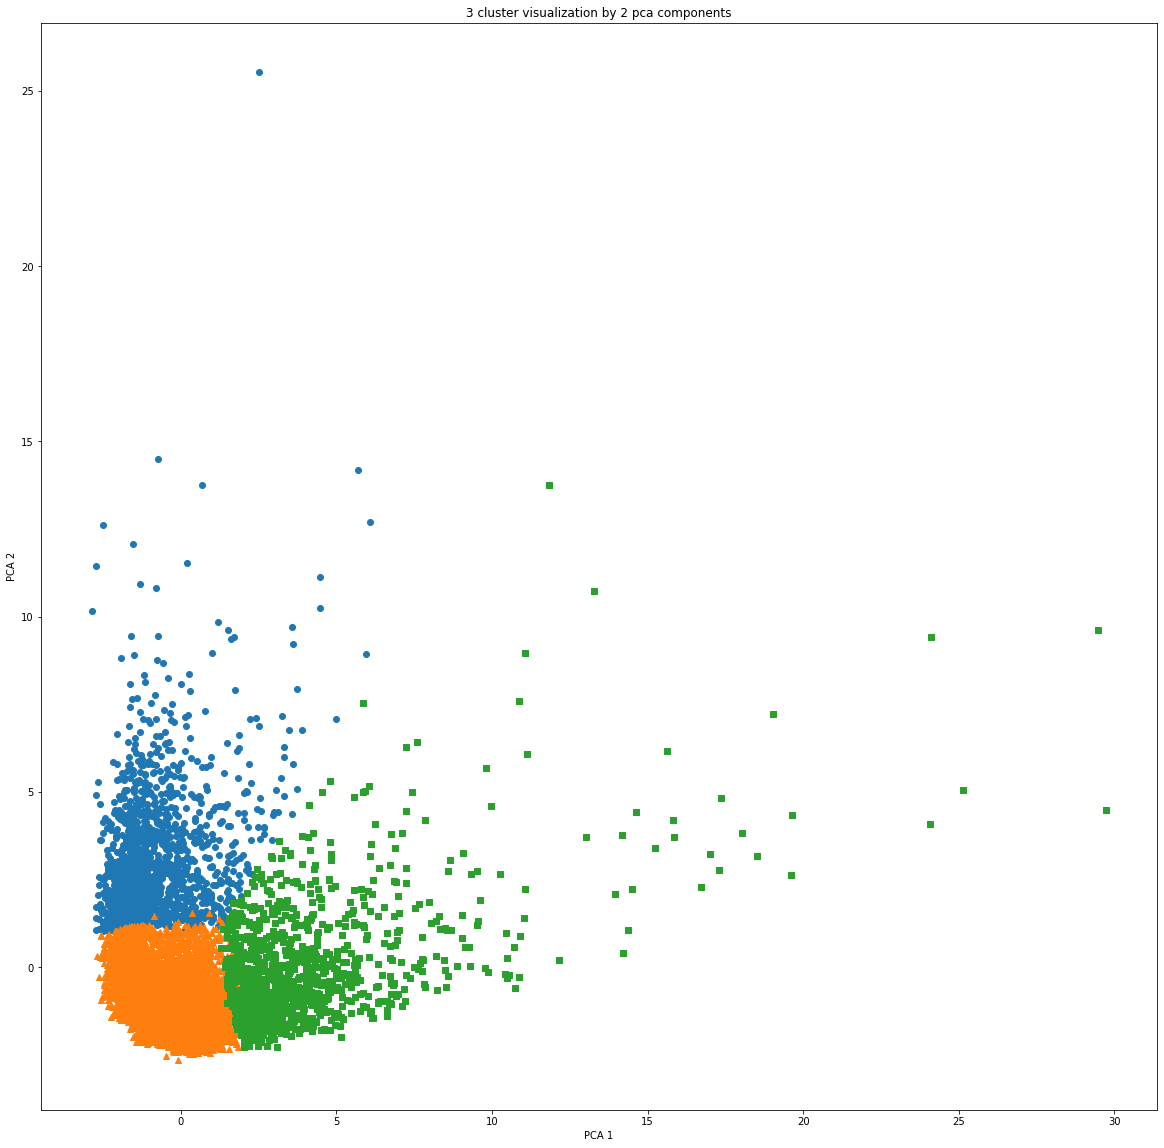

In [32]:
marker0_ind=df_scaled[df_scaled['cluster']==0].index
marker1_ind=df_scaled[df_scaled['cluster']==1].index
marker2_ind=df_scaled[df_scaled['cluster']==2].index

plt.scatter(x=df_scaled.loc[marker0_ind,'pca_x'],y=df_scaled.loc[marker0_ind,'pca_y'],marker='o')
plt.scatter(x=df_scaled.loc[marker1_ind,'pca_x'],y=df_scaled.loc[marker1_ind,'pca_y'],marker='^')
plt.scatter(x=df_scaled.loc[marker2_ind,'pca_x'],y=df_scaled.loc[marker2_ind,'pca_y'],marker='s')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 cluster visualization by 2 pca components')
plt.show()


이게 맞나

In [36]:
df=df.dropna()

In [37]:
score_samples=silhouette_samples(df,df_scaled['cluster'])
print(score_samples.shape)

df_scaled['silhouette_coeff']=score_samples
average_score=silhouette_score(df,df_scaled['cluster'])
print(average_score)
df_scaled.head()

(8636,)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0.34031713170517264


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,pca_x,pca_y,cluster,silhouette_coeff
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960380,-0.528979,-0.305482,-0.525551,0.36068,-1.687315,-1.141223,1,0.658849
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688601,0.818642,0.087735,0.234227,0.36068,-1.242452,2.449359,0,0.189522
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826016,-0.383805,-0.099870,-0.525551,0.36068,0.913399,-0.407281,1,0.290311
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905414,-0.364368,-0.261102,-0.525551,0.36068,-1.635095,-0.775560,1,0.662599
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740516,-0.115060,0.650438,-0.525551,0.36068,0.207992,-0.816307,1,0.533843


In [38]:
df_scaled.groupby('cluster')['silhouette_coeff'].mean()

cluster
0   -0.073252
1    0.541664
2   -0.121135
Name: silhouette_coeff, dtype: float64

엥..